# Statestiek - ANOVA

### Van: Mart Veldkamp

- is er een verschil in leeftijd en de klasse die men vliegt (3 categorieen)
- Is er een verschil in flight distance en de klasse die men vliegt
- (Voor de ANOVA: gebruikResearchpy: zie https://www.pythonfordatascience.org

## 2. Laad de data en laat het zien

In [2]:
import pandas as pd

data = pd.read_csv('Airlinesatisfaction.csv', sep=",")
data = data.drop(columns = ["Unnamed: 0", "id"], axis=1) 

#Voor alles wat geen dataType is, moeten we zelf een datatype "assignen"
data['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)
data['Gender'].replace({'Male': 0, 'Female': 1}, inplace = True)
data['Customer Type'].replace({'disloyal Customer': 0, 'Loyal Customer': 1}, inplace = True)
data['Type of Travel'].replace({'Personal Travel': 0, 'Business travel': 1}, inplace = True)
data['Class'].replace({'Eco': 1, 'Eco Plus': 2, 'Business':3}, inplace = True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  int64  
 1   Customer Type                      103904 non-null  int64  
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  int64  
 4   Class                              103904 non-null  int64  
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

## 3. is er een verschil in leeftijd en de klasse die men vliegt (3 categorieen)

Ik vind het altijd fijn om een verband weer te geven door middel van een histogram en Boxplot. Je kan heel makkelijk aflezen uit een histogram welke klasse welke leeftijdsgroep heeft gekocht. En bij een Boxplot waar de gemiddelde leeftijd/outliers liggen.

<AxesSubplot:xlabel='Class', ylabel='Age'>

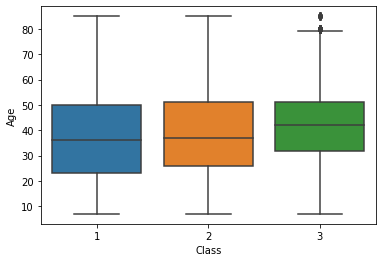

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=data, x="Class", y="Age")

<AxesSubplot:xlabel='Class', ylabel='Age'>

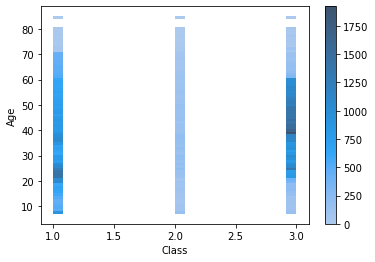

In [4]:
sns.histplot(data=data, x="Class", y="Age", cbar=True)

Wat je hier kan zien is dat gemiddeld genomen, hoe ouder iemand is. Hoe groter de kans is dat hij een 3e class ticket heeft ("Business"). Vooral bij de histogram kan de duidelijk zien dat de 1e klass "Eco" vooral wordt gebruikt door jongere mensen, rond de 20 tot 30. Wat logisch is, want die groep hebben meestal het minst totaal gewerkte uren, dus warscheinlijk ook minder geld. Wat interresant is om te zien, is dat "Eco Pro", de 2e klass. Eigenlijk erg mooi verdeeld is over de totale leeftijd. Hoewel we daar ook minder data van hebben (onder de 500 man per gemeten leeftijd). Terwijl de "Eco" wel populairder is, onder de hele leeftijds klasse.

## 3. Is er een verschil in flight distance en de klasse die men vliegt

Hier gaan we dezelfde truck als hierboven gebruiken, aangezien we nog steeds met geclassificeerde data bezig zijn. Zullen er geen mooie scatter/kde plots gemaakt worden. Omdat we hier praten over een grotere variabelen voorspel ik wel dat er warscheinlijk meer outliers/verschil in de resultaten zullen zitten.

<AxesSubplot:xlabel='Class', ylabel='Flight Distance'>

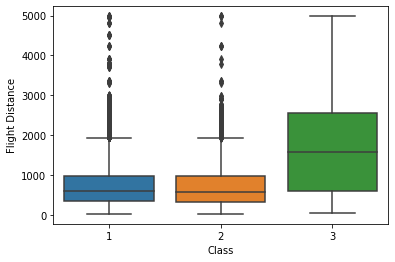

In [5]:
sns.boxplot(data=data, x="Class", y="Flight Distance")

<AxesSubplot:xlabel='Class', ylabel='Age'>

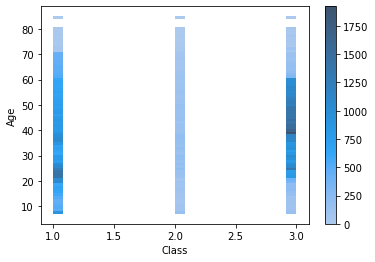

In [6]:
sns.histplot(data=data, x="Class", y="Age", cbar=True)

## 4. ANOVA check

In dit geval zal ik een ANOVA check doen op de variabele 'Age'. Anova staat voor *Analysis of Variance*. En houdt in dat we de variatie in een variabele meten. Dus het gemiddelde, de standaarddeviatie, de standaard error en nog veel meer. Maar het belangrijkste is het kijken hoe betrouwbaar een variabele is.

In [7]:
import researchpy as rp

rp.summary_cont(data['Age'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Age,103904.0,39.3797,15.115,0.0469,39.2878,39.4716


## Conclusie

Zoals voorspelt zit er een redelijk groot verschil in klasse die je vliegt de afstand die je moet vliegen. Bij de boxplot is erg mooi te zien dat hoe verder iemand moet reisen, hoe groter de kans is dat hij voor een "luxere" ticket gaat. Mijn hypothese na deze constatering is omdat hoe verder iemand reist, hoe langer iemand op een slechte/lekkere stoel moet zitten. Hoe liever ze een lekker zittende stoel willen.